In [40]:
import sys
sys.path.append('..')
import math
import numpy as np
import lumapi
from Polarization.extract_polar import extrac_polar
from Polarization.set_angle import set_angle

path = 'D:\\polarization_control\\Square2D_new'
fdtd = lumapi.FDTD(filename = path)
 
kx = fdtd.getnamed('FDTD', 'kx') # in the bandstructure unit
ky = fdtd.getnamed('FDTD', 'ky')
f = 563.52e12 # in Hz unit
a = 380e-9 # dimension m
k_unit = 2 * math.pi / a
omega = 2 * math.pi * f
k_p = k_unit * np.array([kx, ky])

polar_1 = extrac_polar(fdtd, 'monitor_xy_1', omega, k_p)
polar_2 = extrac_polar(fdtd, 'monitor_xy_2', omega, k_p)
fdtd.close()
#T = np.linalg.norm(np.abs(polar))**2 / 2
#print(T)

Data to compare the transmission of Lumerical's and self-calculated

In [ ]:
import matplotlib.pyplot as plt
%matplotlib widget
angle = np.array([-60, -32, -4, 12, 32, 60])
T_fdtd = [-0.717063, -0.805799, -0.603131, -0.793976, -0.805799, -0.717063 ]
T_self = [-0.6882345716441882, -0.7892865933661235, -0.6012820556195664, -0.6012820644146154, -0.7908602963961807, -0.7890992886179404,0.6882345769117709]

The following part is used to test the correctness of calculated phase and polarization, and calculate the phase vortex

In [1]:
import sys
sys.path.append('..')
import math
import numpy as np
import lumapi
import matplotlib.pyplot as plt
from Polarization.extract_polar import extrac_polar
from Polarization.set_angle import set_angle
%load_ext autoreload
%autoreload 2

path = 'D:\\polarization_control\\Square2D_new'
fdtd = lumapi.FDTD(filename = path)

f = 563.52e12 # in Hz unit
a = 380e-9 # dimension m
k_unit = 2 * math.pi / a
omega = 2 * math.pi * f

num = 36
theta = 3.4 * np.ones(num) # in degree
phi = np.linspace(0, 100, num) # in degree
coeff_1, coeff_2 = [], []
trans_1, trans_2 = [], []

for theta_i, phi_i in zip(theta, phi):
    kp = set_angle(fdtd, theta_i, phi_i) # in bandstructure unit
    k_p = k_unit * kp
    fdtd.run()
    polar_1 = extrac_polar(fdtd, 'monitor_xy_1', omega, k_p)
    polar_2 = extrac_polar(fdtd, 'monitor_xy_2', omega, k_p)
    T_1 = np.linalg.norm(np.abs(polar_1))**2 / 2
    T_2 = np.linalg.norm(np.abs(polar_1))**2 / 2

    trans_1.append(T_1)
    coeff_1.append(polar_1)
    trans_2.append(T_2)
    coeff_2.append(polar_2)
    sys.stdout.write('.')
print('')
fdtd.close()



....................................


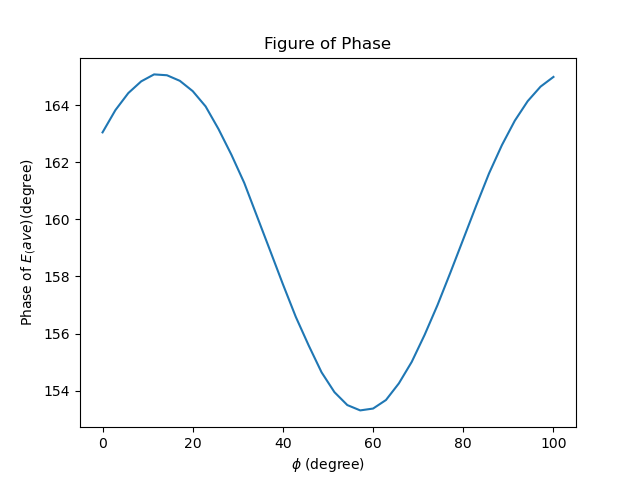

In [5]:
%matplotlib widget
coeff_o = np.load('coeff_1_nostruct.npy')
coeff = np.array(coeff_1)
phase = np.angle(coeff[:, 0], deg = True)
plt.plot(phi, phase)
plt.title('Figure of Phase')
plt.xlabel('$\phi$ (degree)')
plt.ylabel('Phase of $E_(ave)$(degree)')
plt.show()

FFT analysis of the fields

In [3]:
import sys
sys.path.append('..')
import math
import numpy as np
import lumapi
from Polarization.extract_polar import extrac_polar
from Polarization.set_angle import set_angle
from Lumerical_methods.lumerical_scripts import get_field

path = 'D:\\polarization_control\\Square2D_new'
fdtd = lumapi.FDTD(filename = path)

kx = fdtd.getnamed('FDTD', 'kx') # in the bandstructure unit
ky = fdtd.getnamed('FDTD', 'ky')
f = 563.52e12 # in Hz unit
a = 380e-9 # dimension m
k_unit = 2 * math.pi / a
omega = 2 * math.pi * f
k_p = k_unit * np.array([kx, ky])

fields = get_field(fdtd, 'monitor_xy_1', field_result_name = 'fields', get_eps = False, get_D = False, get_H = False, noninterpolation = False)
E_fields = fields.E[:, :, 0, 0, 0]
fdtd.close()

xx, yy = np.meshgrid(fields.x, fields.y)
kernel = np.exp(-1j *(k_p[0] * xx + k_p[1] * yy))
E_shifted = np.transpose(E_fields) * kernel
E_fft = np.fft.fft2(E_shifted)


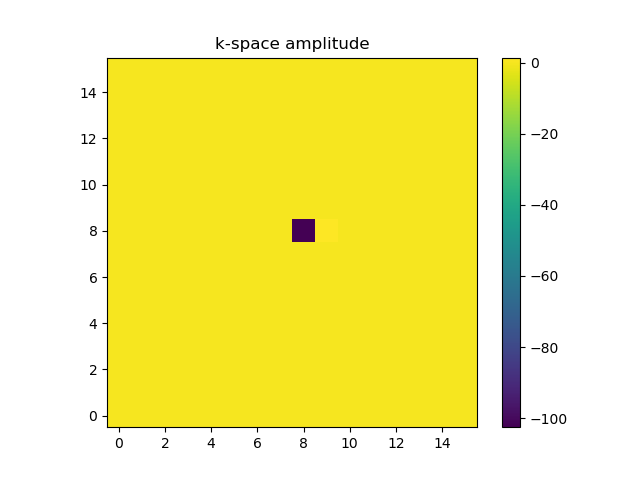

In [6]:
import matplotlib.pyplot as plt
%matplotlib widget
fft_shift = np.fft.fftshift(E_fft)
plt.imshow(np.real(fft_shift), )
plt.colorbar()
plt.title('k-space amplitude')
plt.gca().invert_yaxis()

In [41]:
np.angle(polar_1[1], deg = True) - np.angle(polar_2[1], deg = True)

array([17.79537857])

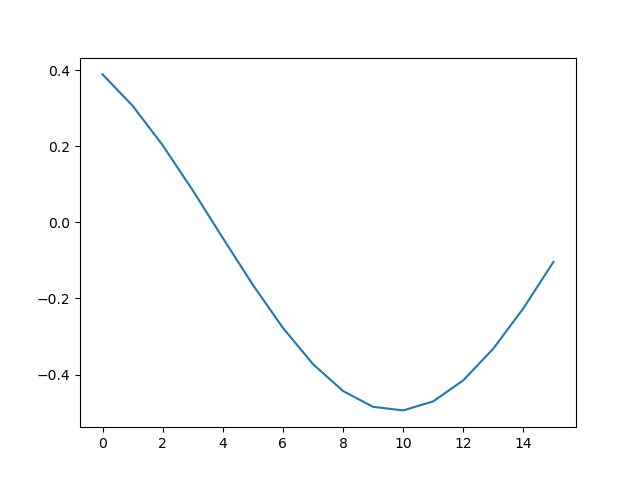

In [2]:
import matplotlib.pyplot as plt
%matplotlib widget
plt.plot(np.real(E_fields[:, 0]))
plt.show()